In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import statistics as st
from dotenv import load_dotenv


load_dotenv()

import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts.utils import *
from DB_Connection.connection import ConnectionToPostgres

username = os.getenv('DB_USERNAME')
password = os.getenv('DB_PASSWORD')
name = os.getenv('DB_NAME')
host = os.getenv('DB_HOST')
port = os.getenv('DB_PORT')

In [2]:
db = ConnectionToPostgres(dbname=name, user=username, password=password, host=host, port=port)
db.connect()

query = 'select * from xdr_data'
result = db.execute(query)

df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])#-
# df.head()

db.close_connection()

Connected to the PostgreSQL database
PostgreSQL connection is closed


In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0
150000,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,None,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,NaN,NaN


In [5]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [6]:
df.shape

(150001, 55)

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 55)


In [8]:
df.count()

Bearer Id                                   149010
Start                                       150000
Start ms                                    150000
End                                         150000
End ms                                      150000
Dur. (ms)                                   150000
IMSI                                        149431
MSISDN/Number                               148935
IMEI                                        149429
Last Location Name                          148848
Avg RTT DL (ms)                             122172
Avg RTT UL (ms)                             122189
Avg Bearer TP DL (kbps)                     150000
Avg Bearer TP UL (kbps)                     150000
TCP DL Retrans. Vol (Bytes)                  61855
TCP UL Retrans. Vol (Bytes)                  53352
DL TP < 50 Kbps (%)                         149247
50 Kbps < DL TP < 250 Kbps (%)              149247
250 Kbps < DL TP < 1 Mbps (%)               149247
DL TP > 1 Mbps (%)             

In [9]:
print(percentage_missing_values(df))

The telecom contains Bearer Id                                    0.66
Start                                        0.00
Start ms                                     0.00
End                                          0.00
End ms                                       0.00
Dur. (ms)                                    0.00
IMSI                                         0.38
MSISDN/Number                                0.71
IMEI                                         0.38
Last Location Name                           0.77
Avg RTT DL (ms)                             18.55
Avg RTT UL (ms)                             18.54
Avg Bearer TP DL (kbps)                      0.00
Avg Bearer TP UL (kbps)                      0.00
TCP DL Retrans. Vol (Bytes)                 58.76
TCP UL Retrans. Vol (Bytes)                 64.43
DL TP < 50 Kbps (%)                          0.50
50 Kbps < DL TP < 250 Kbps (%)               0.50
250 Kbps < DL TP < 1 Mbps (%)                0.50
DL TP > 1 Mbps (%)           

In [10]:
print(df.isnull().sum())

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Droppping Some Columns

In [11]:
df = df.drop(columns=["Nb of sec with 125000B < Vol DL", "Nb of sec with 1250B < Vol UL < 6250B", "Nb of sec with 31250B < Vol DL < 125000B",
"Nb of sec with 37500B < Vol UL", "Nb of sec with 6250B < Vol UL < 37500B", "HTTP DL (Bytes)", "HTTP UL (Bytes)", "Avg RTT DL (ms)", "Avg RTT UL (ms)", "TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)", "Nb of sec with 6250B < Vol DL < 31250B"])
df.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [12]:
df.count()

Bearer Id                         149010
Start                             150000
Start ms                          150000
End                               150000
End ms                            150000
Dur. (ms)                         150000
IMSI                              149431
MSISDN/Number                     148935
IMEI                              149429
Last Location Name                148848
Avg Bearer TP DL (kbps)           150000
Avg Bearer TP UL (kbps)           150000
DL TP < 50 Kbps (%)               149247
50 Kbps < DL TP < 250 Kbps (%)    149247
250 Kbps < DL TP < 1 Mbps (%)     149247
DL TP > 1 Mbps (%)                149247
UL TP < 10 Kbps (%)               149209
10 Kbps < UL TP < 50 Kbps (%)     149209
50 Kbps < UL TP < 300 Kbps (%)    149209
UL TP > 300 Kbps (%)              149209
Activity Duration DL (ms)         150000
Activity Duration UL (ms)         150000
Dur. (ms).1                       150000
Handset Manufacturer              149429
Handset Type    

Top 10 handsets used by the customers

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

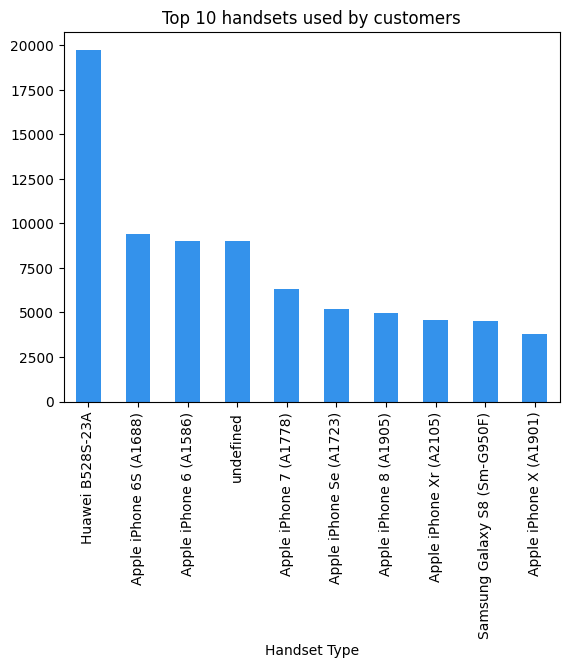

In [13]:
handset_type= df['Handset Type'].value_counts()[0:10]
handset_type.plot.bar(x='Handset Type', title="Top 10 handsets used by customers", stacked=True, color='#3492eb')
handset_type

Top 3 handset manufacturers

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

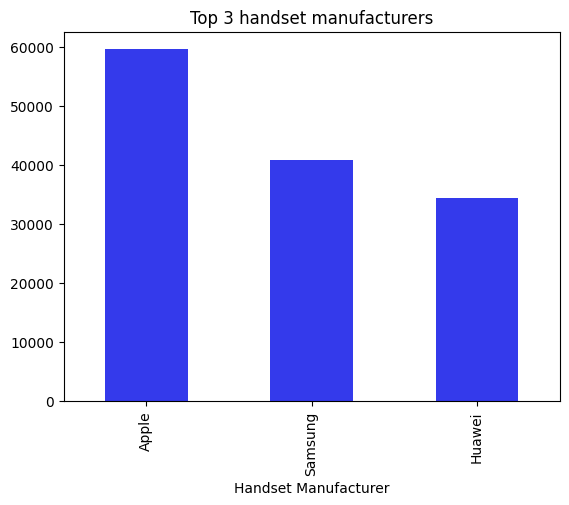

In [14]:
Handset_manufacturers = df['Handset Manufacturer'].value_counts()[0:3]
Handset_manufacturers.plot.bar(x='Handset Manufacturer', title="Top 3 handset manufacturers", stacked=True, color='#343aeb')
Handset_manufacturers

Top 5 handsets per top 3 handset manufacturer

count
Handset Manufacturer Handset Type                  
Apple                Apple iPhone 6S (A1688)   9419
                     Apple iPhone 6 (A1586)    9023
                     Apple iPhone 7 (A1778)    6326
                     Apple iPhone Se (A1723)   5187
                     Apple iPhone 8 (A1905)    4993

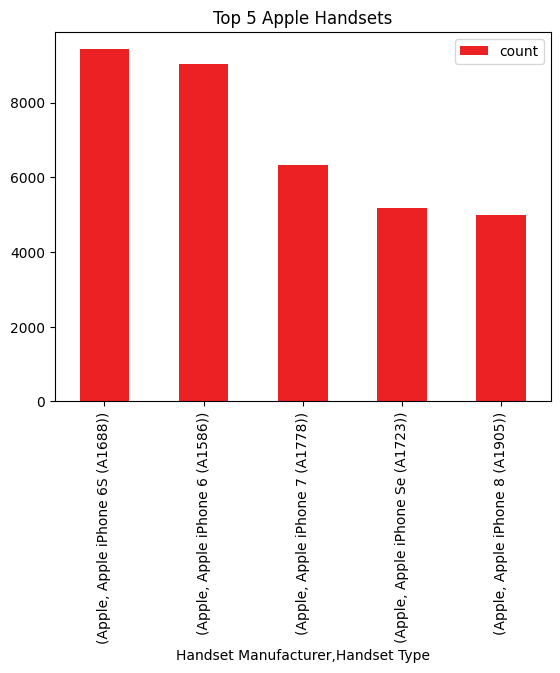

In [15]:
top_apple = df.loc[df['Handset Manufacturer'] == 'Apple']
top_apple = top_apple.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_apple.columns = ['count']
top_apple=top_apple.nlargest(5, 'count')
top_apple.plot.bar(y='count', title="Top 5 Apple Handsets", stacked=True, color='#ec2123')
top_apple

count
Handset Manufacturer Handset Type                       
Samsung              Samsung Galaxy S8 (Sm-G950F)   4520
                     Samsung Galaxy A5 Sm-A520F     3724
                     Samsung Galaxy J5 (Sm-J530)    3696
                     Samsung Galaxy J3 (Sm-J330)    3484
                     Samsung Galaxy S7 (Sm-G930X)   3199

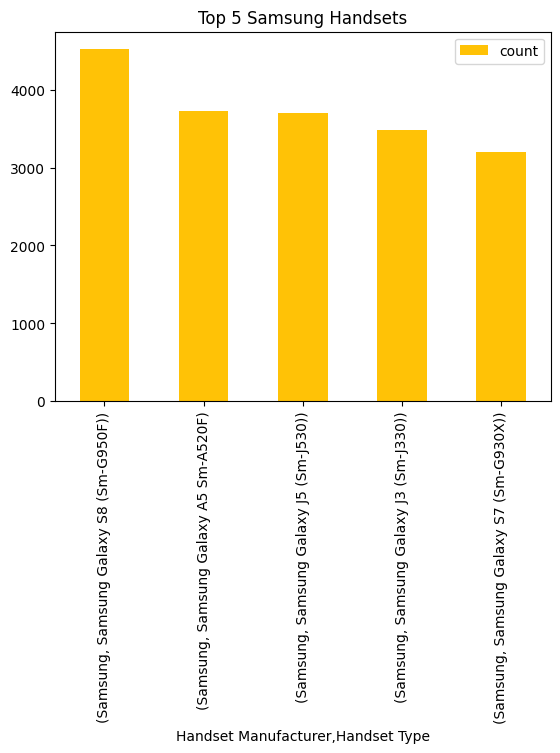

In [16]:
top_samsung = df.loc[df['Handset Manufacturer'] == 'Samsung']
top_samsung = top_samsung.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_samsung.columns = ['count']
top_samsung=top_samsung.nlargest(5, 'count')
top_samsung.plot.bar(y='count', title="Top 5 Samsung Handsets", stacked=True, color='#ffc206')
top_samsung

count
Handset Manufacturer Handset Type                         
Huawei               Huawei B528S-23A                19752
                     Huawei E5180                     2079
                     Huawei P20 Lite Huawei Nova 3E   2021
                     Huawei P20                       1480
                     Huawei Y6 2018                    997

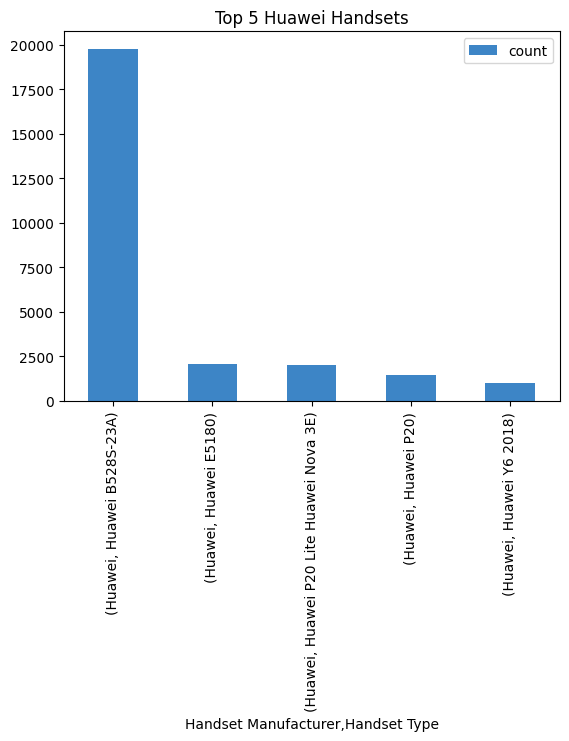

In [17]:
top_huawei = df.loc[df['Handset Manufacturer'] == 'Huawei']
top_huawei = top_huawei.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_huawei.columns = ['count']
top_huawei=top_huawei.nlargest(5, 'count')
top_huawei.plot.bar(y='count', title="Top 5 Huawei Handsets", stacked=True, color='#3d85c6')
top_huawei

The analysis concludes the following points:

- The Huawei B528S-23A is the most favored phone model among consumers and is made by Huawei.

- The leading smartphone manufacturers are Apple with 59,339 units, Samsung with 40,429 units, and Huawei with 34,296 units.

- Customers show no clear preference for Apple's phones over Samsung's, and Samsung's manufacturing process is similar to Apple's.

### Task 1.1

number of xDR sessions

In [18]:
xDR_session_per_user = df.groupby('MSISDN/Number')['Bearer Id'].sum()
xDR_session_per_user

MSISDN/Number
3.360100e+10    1.311448e+19
3.360100e+10    7.349883e+18
3.360100e+10    7.349883e+18
3.360101e+10    1.304243e+19
3.360101e+10    1.462771e+19
                    ...     
3.379000e+10    1.304243e+19
3.379000e+10    1.311448e+19
3.197021e+12    7.277826e+18
3.370000e+14    7.349883e+18
8.823971e+14    7.277826e+18
Name: Bearer Id, Length: 106856, dtype: float64

Session duration

In [19]:
session_duration_per_user = df.groupby('MSISDN/Number')['Dur. (ms)'].sum()
session_duration_per_user

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106856, dtype: float64

the total download (DL) and upload (UL) data

In [20]:
total_ul = df.groupby('MSISDN/Number')['Total UL (Bytes)'].sum()
total_dl = df.groupby('MSISDN/Number')['Total DL (Bytes)'].sum()
print(f'total upload:\n{total_ul}\n\ntotal download:\n{total_dl}\n\ntotal upload + download: {total_dl+total_ul}')

total upload:
MSISDN/Number
3.360100e+10    36053108.0
3.360100e+10    36104459.0
3.360100e+10    39306820.0
3.360101e+10    20327526.0
3.360101e+10    94280527.0
                   ...    
3.379000e+10    26716429.0
3.379000e+10    35732243.0
3.197021e+12    37295915.0
3.370000e+14    56652839.0
8.823971e+14    60456049.0
Name: Total UL (Bytes), Length: 106856, dtype: float64

total download:
MSISDN/Number
3.360100e+10    8.426375e+08
3.360100e+10    1.207552e+08
3.360100e+10    5.566597e+08
3.360101e+10    4.019932e+08
3.360101e+10    1.363130e+09
                    ...     
3.379000e+10    6.879252e+08
3.379000e+10    4.445751e+08
3.197021e+12    1.948281e+08
3.370000e+14    5.396350e+08
8.823971e+14    7.869760e+07
Name: Total DL (Bytes), Length: 106856, dtype: float64

total upload + download: MSISDN/Number
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
                    ...     
3


The total data volume (in Bytes) during this session for each application

In [21]:
total_google = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
total_email = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
total_gaming = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']

total_youtube = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
total_netflix = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
total_social = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
total_other = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

# add the total data volumes on the main data set
df['total_google'] = total_google
df['total_email'] = total_email
df['total_gaming'] = total_gaming

df['total_youtube'] = total_youtube
df['total_netflix'] = total_netflix
df['total_social'] = total_social
df['total_other'] = total_other

# aggregate total data volume per application
# google
total_data_volume_per_user_google = df.groupby('MSISDN/Number')['total_google'].sum()
print(f'{total_data_volume_per_user_google}\n')

# email
total_data_volume_per_user_email = df.groupby('MSISDN/Number')['total_email'].sum()
print(f'{total_data_volume_per_user_email}\n')

# gaming
total_data_volume_per_user_gaming = df.groupby('MSISDN/Number')['total_gaming'].sum()
print(f'{total_data_volume_per_user_gaming}\n')

# youtube
total_data_volume_per_user_youtube = df.groupby('MSISDN/Number')['total_youtube'].sum()
print(f'{total_data_volume_per_user_youtube}\n')

# netflix
total_data_volume_per_user_netflix = df.groupby('MSISDN/Number')['total_netflix'].sum()
print(f'{total_data_volume_per_user_netflix}\n') 

# social
total_data_volume_per_user_social = df.groupby('MSISDN/Number')['total_social'].sum()
print(f'{total_data_volume_per_user_social}\n')

# other
total_data_volume_per_user_other = df.groupby('MSISDN/Number')['total_other'].sum()
print(f'{total_data_volume_per_user_other}\n')

MSISDN/Number
3.360100e+10     4389005.0
3.360100e+10     5334863.0
3.360100e+10     3443126.0
3.360101e+10     9678493.0
3.360101e+10    18499616.0
                   ...    
3.379000e+10     7531269.0
3.379000e+10     5429705.0
3.197021e+12    10438660.0
3.370000e+14     9830617.0
8.823971e+14     9218647.0
Name: total_google, Length: 106856, dtype: float64

MSISDN/Number
3.360100e+10    1331362.0
3.360100e+10    3307781.0
3.360100e+10    3205380.0
3.360101e+10    2284670.0
3.360101e+10    3305469.0
                  ...    
3.379000e+10    1006915.0
3.379000e+10    2514097.0
3.197021e+12    1520771.0
3.370000e+14    3318582.0
8.823971e+14    3330974.0
Name: total_email, Length: 106856, dtype: float64

MSISDN/Number
3.360100e+10    8.124587e+08
3.360100e+10    1.197501e+08
3.360100e+10    5.388277e+08
3.360101e+10    3.911261e+08
3.360101e+10    1.314798e+09
                    ...     
3.379000e+10    6.603614e+08
3.379000e+10    4.370033e+08
3.197021e+12    1.780487e+08
3.370000e+1

### Task 1.2

Analyze the basic metrics (mean, median, etc) in the Dataset

In [22]:
relevant_features = ['Dur. (ms)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_google', 'total_email', 'total_gaming', 'total_youtube', 'total_netflix', 'total_social', 'total_other']


print("Mean\n", df[relevant_features].mean(), '\n')
print("Median\n", df[relevant_features].median(), '\n')

mode_series = pd.Series(df[relevant_features].mode().values[0], index=relevant_features)
print("Mode\n", mode_series, '\n')

print("Highest\n", df[relevant_features].max(), '\n')
print("lowest\n", df[relevant_features].min(), '\n')

Mean
 Dur. (ms)                    1.046086e+05
Activity Duration DL (ms)    1.829177e+06
Activity Duration UL (ms)    1.408880e+06
Social Media DL (Bytes)      1.795322e+06
Social Media UL (Bytes)      3.292843e+04
Google DL (Bytes)            5.750753e+06
Google UL (Bytes)            2.056542e+06
Email DL (Bytes)             1.791729e+06
Email UL (Bytes)             4.673734e+05
Youtube DL (Bytes)           1.163407e+07
Youtube UL (Bytes)           1.100941e+07
Netflix DL (Bytes)           1.162685e+07
Netflix UL (Bytes)           1.100175e+07
Gaming DL (Bytes)            4.220447e+08
Gaming UL (Bytes)            8.288398e+06
Other DL (Bytes)             4.211005e+08
Other UL (Bytes)             8.264799e+06
Total UL (Bytes)             4.112121e+07
Total DL (Bytes)             4.546434e+08
total_google                 7.807295e+06
total_email                  2.259102e+06
total_gaming                 4.303331e+08
total_youtube                2.264348e+07
total_netflix               

Non-Graphical Univariate Analysis


Computing dispersion parameters for each quantitative variable`

In [23]:
sub_relevant_features = ['MSISDN/Number','Dur. (ms)','Total UL (Bytes)', 'Total DL (Bytes)', 'total_google','total_email','total_gaming','total_youtube','total_netflix','total_social', 'total_other']

df[sub_relevant_features].describe()

,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes),total_google,total_email,total_gaming,total_youtube,total_netflix,total_social,total_other
count,1.489350e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,4.188282e+10,1.046086e+05,4.112121e+07,4.546434e+08,7.807295e+06,2.259102e+06,4.303331e+08,2.264348e+07,2.262861e+07,1.828250e+06,4.293653e+08
std,2.447443e+12,8.103762e+04,1.127639e+07,2.441429e+08,3.516420e+06,1.071109e+06,2.440199e+08,9.246800e+06,9.260820e+06,1.035646e+06,2.432681e+08
min,3.360100e+10,7.142000e+03,2.866892e+06,7.114041e+06,4.033000e+04,8.359000e+03,3.063580e+05,7.890300e+04,9.843200e+04,1.563000e+03,1.490450e+05
25%,3.365130e+10,5.744050e+04,3.322201e+07,2.431068e+08,4.943599e+06,1.359344e+06,2.187279e+08,1.599846e+07,1.597946e+07,9.322180e+05,2.185534e+08
50%,3.366371e+10,8.639900e+04,4.114331e+07,4.558411e+08,7.812835e+06,2.263567e+06,4.316150e+08,2.266177e+07,2.263554e+07,1.826471e+06,4.299865e+08
75%,3.368349e+10,1.324302e+05,4.903424e+07,6.657055e+08,1.068280e+07,3.159818e+06,6.414159e+08,2.929260e+07,2.929044e+07,2.727487e+06,6.399275e+08
max,8.823971e+14,1.859336e+06,7.833131e+07,9.029696e+08,1.552878e+07,4.518036e+06,8.592028e+08,4.519008e+07,4.519815e+07,3.650861e+06,8.595209e+08


Graphical Univariate Analysis

In [24]:
for cols in relevant_features:
    print(cols)
    print("Mean", st.mean(df[cols]))
   
    print("Mode", st.mode(df[cols]))

    print("Median", st.median(df[cols]))

    print("Skew", df[cols].skew())
    print('----')

Dur. (ms)
Mean nan
Mode 86399.0
Median 86399.0
Skew 3.9526086118445334
----
Activity Duration DL (ms)
Mean nan
Mode 0.0
Median 39305.0
Skew 5.872255845624152
----
Activity Duration UL (ms)
Mean nan
Mode 0.0
Median 46794.0
Skew 7.3825567205800935
----
Social Media DL (Bytes)
Mean 1795321.7736466667
Mode 2865700.0
Median 1794369.0
Skew -0.002136239313678743
----
Social Media UL (Bytes)
Mean 32928.43438
Mode 30810.0
Median 32920.0
Skew -0.00035925291932168823
----
Google DL (Bytes)
Mean 5750752.619286667
Mode 6296014.0
Median 5765829.0
Skew -0.008092347926327225
----
Google UL (Bytes)
Mean 2056541.9262866667
Mode 3426526.0
Median 2054573.0
Skew 0.0022156581577222954
----
Email DL (Bytes)
Mean 1791728.86802
Mode 1829513.0
Median 1793505.0
Skew -0.0024631963149959
----
Email UL (Bytes)
Mean 467373.44194
Mode 370236.0
Median 466250.0
Skew 0.007357611954578932
----
Youtube DL (Bytes)
Mean 11634072.5039
Mode 18869169.0
Median 11616019.0
Skew 0.00023117977740596312
----
Youtube UL (Bytes)
Mean 

Bivariate Analysis

Explore the relationship between each application & the total DL+UL data

In [25]:
sample_data = df.sample(frac=0.000099)
print(sample_data.shape)
sum_column = sample_data["Total DL (Bytes)"] + sample_data["Total UL (Bytes)"]

(15, 50)


In [26]:
sample_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (

In [27]:
df["Youtube_Total_Data"]=df["Youtube DL (Bytes)"]+df["Youtube UL (Bytes)"]
df["Google_Total_Data"]=df["Google DL (Bytes)"]+df["Google UL (Bytes)"]
df["Email_Total_Data"]=df["Email DL (Bytes)"]+df["Email UL (Bytes)"]
df["Social_Media_Total_Data"]=df["Social Media DL (Bytes)"]+df["Social Media UL (Bytes)"]
df["Netflix_Total_Data"]=df["Netflix DL (Bytes)"]+df["Netflix UL (Bytes)"]
df["Gaming_Total_Data"]=df["Gaming DL (Bytes)"]+df["Gaming UL (Bytes)"]
df["Other_Total_Data"]=df["Other DL (Bytes)"]+df["Other UL (Bytes)"]
df["Total UL and DL"]=df["Total UL (Bytes)"]+df["Total DL (Bytes)"]

In [28]:
columns = ['MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']

user_ratio_usage= df[columns].groupby('MSISDN/Number').sum()
user_ratio_usage.head(10)

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
MSISDN/Number,,,,,,,,
3.360100e+10,21624548.0,4389005.0,1331362.0,2232135.0,27180981.0,8.124587e+08,3.865709e+08,8.786906e+08
3.360100e+10,12432223.0,5334863.0,3307781.0,2660565.0,11221763.0,1.197501e+08,2.817101e+08,1.568596e+08
3.360100e+10,21333570.0,3443126.0,3205380.0,3195623.0,19353900.0,5.388277e+08,5.016937e+08,5.959665e+08
3.360101e+10,6977321.0,9678493.0,2284670.0,280294.0,1942092.0,3.911261e+08,3.527970e+07,4.223207e+08
3.360101e+10,41533002.0,18499616.0,3305469.0,2912542.0,49201724.0,1.314798e+09,8.048045e+08,1.457411e+09
3.360101e+10,34347122.0,15263134.0,7848596.0,3792912.0,30315501.0,5.116358e+08,4.923728e+08,6.152172e+08
3.360101e+10,26431335.0,10196403.0,1358959.0,2769627.0,45812397.0,5.484611e+08,2.248887e+08,6.547231e+08
3.360101e+10,18892740.0,12023614.0,2215563.0,1782692.0,15292840.0,2.823644e+08,1.782015e+08,3.326604e+08
3.360101e+10,63443802.0,14134211.0,4599825.0,5288685.0,54216117.0,8.330880e+08,1.041883e+09,9.901322e+08


In [29]:
apps_columns = ['Dur. (ms)','MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']

In [30]:
user_ratio_usage = df[apps_columns]

user_ratio_usage.columns

Index(['Dur. (ms)', 'MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data',
       'Email_Total_Data', 'Social_Media_Total_Data', 'Netflix_Total_Data',
       'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL'],
      dtype='object')

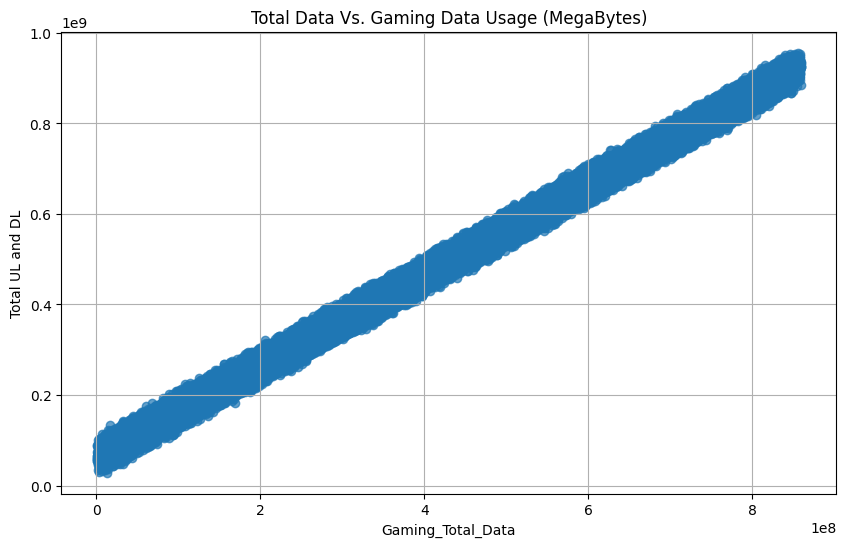

In [31]:
def plot_scatter(data, x_col, y_col, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_col], data[y_col], alpha=0.7)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()

# Plot scatter plot
plot_scatter(user_ratio_usage, 'Gaming_Total_Data', 'Total UL and DL', 'Total Data Vs. Gaming Data Usage (MegaBytes)')

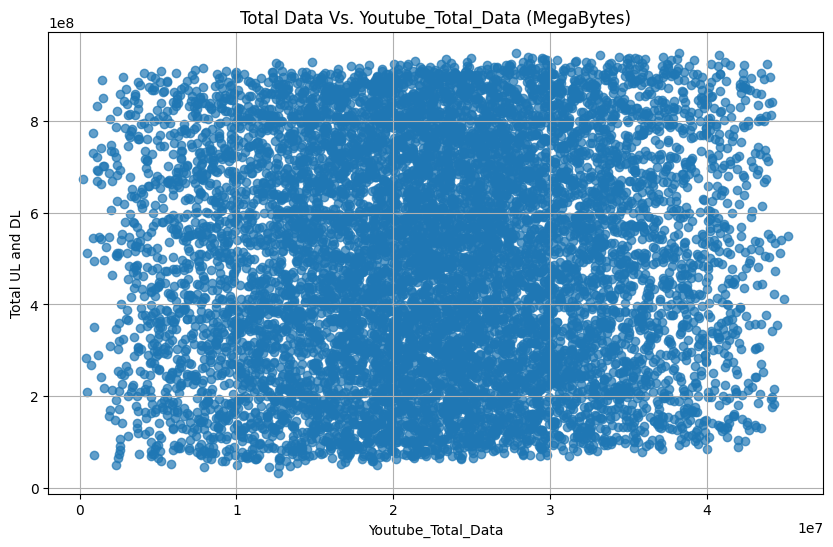

In [32]:
plot_scatter(user_ratio_usage.sample(10000), 'Youtube_Total_Data', 'Total UL and DL', 'Total Data Vs. Youtube_Total_Data (MegaBytes)')

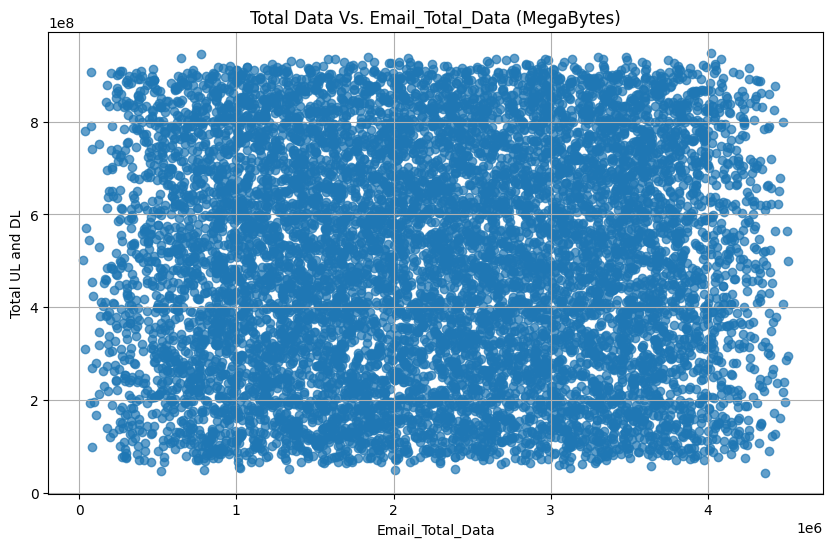

In [33]:
plot_scatter(user_ratio_usage.sample(10000), 'Email_Total_Data', 'Total UL and DL', 'Total Data Vs. Email_Total_Data (MegaBytes)')

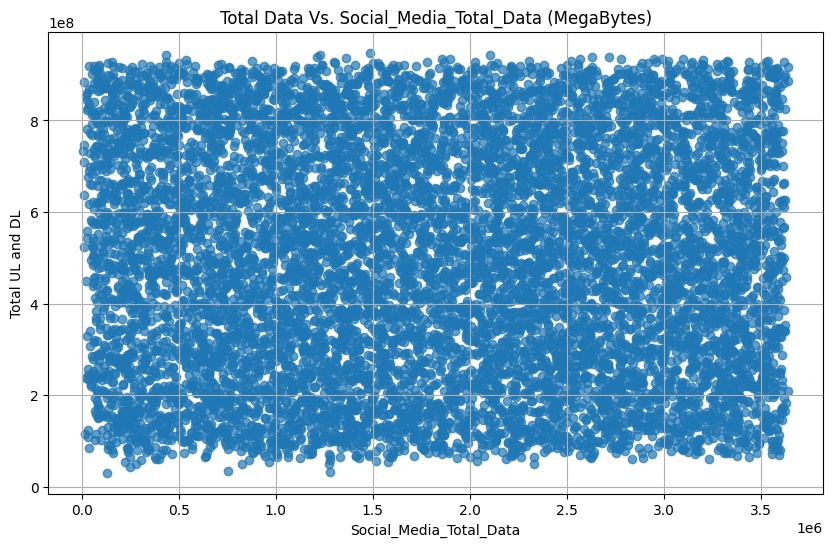

In [34]:
plot_scatter(user_ratio_usage.sample(10000), 'Social_Media_Total_Data', 'Total UL and DL', 'Total Data Vs. Social_Media_Total_Data (MegaBytes)')

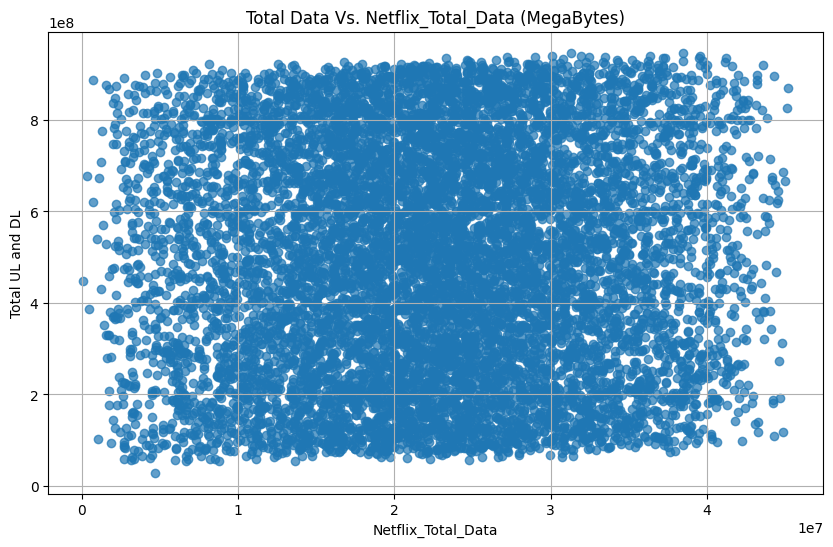

In [35]:
plot_scatter(user_ratio_usage.sample(10000), 'Netflix_Total_Data', 'Total UL and DL', 'Total Data Vs. Netflix_Total_Data (MegaBytes)')

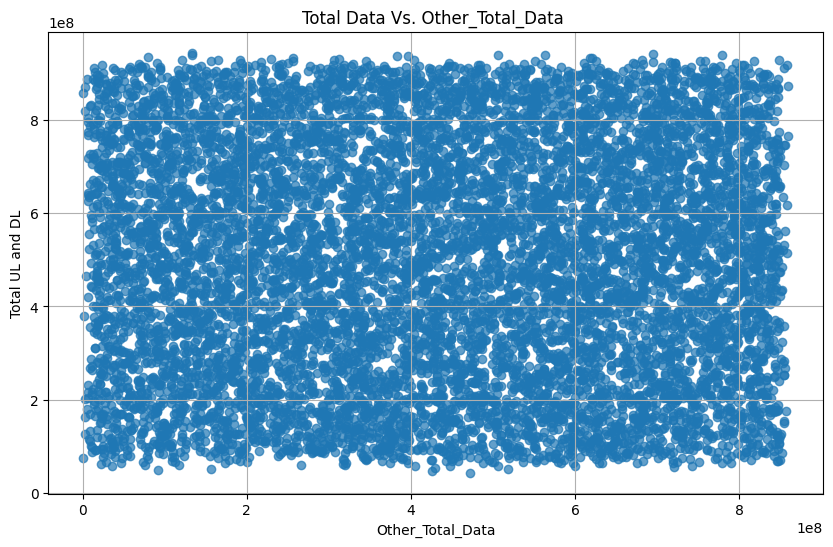

In [36]:
plot_scatter(user_ratio_usage.sample(10000), 'Other_Total_Data', 'Total UL and DL', 'Total Data Vs. Other_Total_Data ')

Variable transformations

segmenting the users into top 5 decile classes

C:\Users\Leul\AppData\Local\Temp\ipykernel_12652\947645853.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax=df.groupby('decile')['total_data'].sum().head(5).plot(kind='bar', xticks=[0,1,2,3,4])


Text(0, 0.5, 'Data Durations')

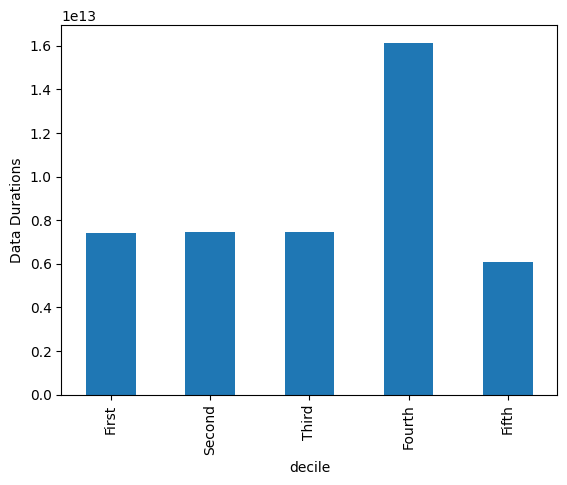

In [37]:
# compute the total dl and ul
df['total_data'] = df["Total DL (Bytes)"] + df["Total UL (Bytes)"]

# compute the decile classes
df['decile'] = pd.qcut(df['Dur. (ms)'],10, duplicates='drop')

ax=df.groupby('decile')['total_data'].sum().head(5).plot(kind='bar', xticks=[0,1,2,3,4])
ax.set_xticklabels(['First','Second','Third','Fourth','Fifth'])
ax.set_ylabel('Data Durations')

Correlation Analysis

In [38]:
columns = ['Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']
corr = user_ratio_usage[columns].corr()
corr

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
Youtube_Total_Data,1.000000,0.002277,-0.002919,0.000548,0.002882,-0.002999,0.002969,0.034888
Google_Total_Data,0.002277,1.000000,-0.000412,-0.001708,-0.001902,-0.000994,-0.001727,0.013370
Email_Total_Data,-0.002919,-0.000412,1.000000,0.004032,0.001029,-0.000644,-0.001299,0.003768
Social_Media_Total_Data,0.000548,-0.001708,0.004032,1.000000,0.001013,0.001082,0.006065,0.005383
Netflix_Total_Data,0.002882,-0.001902,0.001029,0.001013,1.000000,-0.003109,-0.009033,0.034798
Gaming_Total_Data,-0.002999,-0.000994,-0.000644,0.001082,-0.003109,1.000000,-0.002661,0.998254
Other_Total_Data,0.002969,-0.001727,-0.001299,0.006065,-0.009033,-0.002661,1.000000,-0.002443
Total UL and DL,0.034888,0.013370,0.003768,0.005383,0.034798,0.998254,-0.002443,1.000000


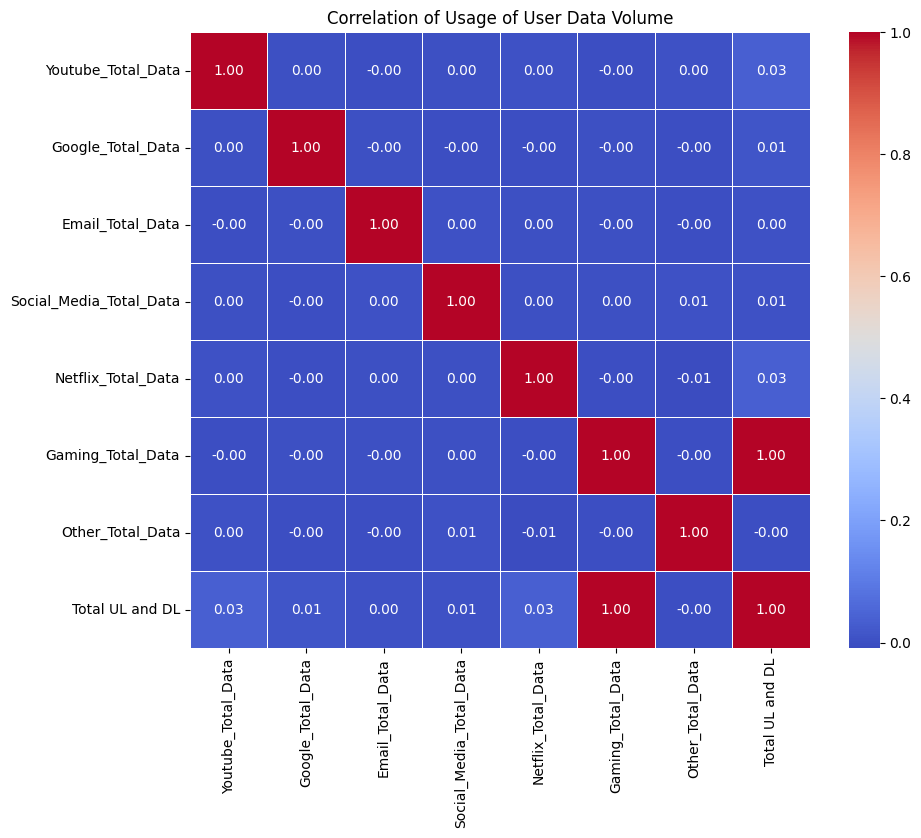

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Usage of User Data Volume')
plt.show()

Dimensionality Reduction

In [40]:
numeric_df = user_ratio_usage.select_dtypes(include='float64') 

In [41]:
numeric_df.describe()

,Dur. (ms),MSISDN/Number,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
count,1.500000e+05,1.489350e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05
mean,1.046086e+05,4.188282e+10,2.264348e+07,7.807295e+06,2.259102e+06,1.828250e+06,2.262861e+07,4.303331e+08,4.293653e+08,4.957646e+08
std,8.103762e+04,2.447443e+12,9.246800e+06,3.516420e+06,1.071109e+06,1.035646e+06,9.260820e+06,2.440199e+08,2.432681e+08,2.443818e+08
min,7.142000e+03,3.360100e+10,7.890300e+04,4.033000e+04,8.359000e+03,1.563000e+03,9.843200e+04,3.063580e+05,1.490450e+05,2.895611e+07
25%,5.744050e+04,3.365130e+10,1.599846e+07,4.943599e+06,1.359344e+06,9.322180e+05,1.597946e+07,2.187279e+08,2.185534e+08,2.844759e+08
50%,8.639900e+04,3.366371e+10,2.266177e+07,7.812835e+06,2.263567e+06,1.826471e+06,2.263554e+07,4.316150e+08,4.299865e+08,4.968611e+08
75%,1.324302e+05,3.368349e+10,2.929260e+07,1.068280e+07,3.159818e+06,2.727487e+06,2.929044e+07,6.414159e+08,6.399275e+08,7.065059e+08
max,1.859336e+06,8.823971e+14,4.519008e+07,1.552878e+07,4.518036e+06,3.650861e+06,4.519815e+07,8.592028e+08,8.595209e+08,9.559848e+08


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(numeric_df)

StandardScaler()

In [43]:
scaled_data = scaler.transform(numeric_df)

In [44]:
numeric_df.head()

,Dur. (ms),MSISDN/Number,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
0,1823652.0,3.366496e+10,18355943.0,2905912.0,3701304.0,1570185.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1365104.0,3.368185e+10,39359124.0,4414096.0,937385.0,1933278.0,35565545.0,609920783.0,541959383.0,707185356.0
2,1361762.0,3.376063e+10,34425237.0,10229119.0,3363124.0,1726277.0,23751202.0,229980251.0,414908351.0,307690973.0
3,1321509.0,3.375034e+10,36534765.0,11811761.0,2070983.0,657493.0,15092588.0,810387875.0,761837216.0,889352748.0
4,1089009.0,3.369980e+10,34222253.0,7748843.0,2110349.0,912788.0,17539799.0,531237049.0,564619822.0,607681403.0


In [45]:
numeric_df.isnull().sum()

Dur. (ms)                     1
MSISDN/Number              1066
Youtube_Total_Data            0
Google_Total_Data             0
Email_Total_Data              0
Social_Media_Total_Data       0
Netflix_Total_Data            0
Gaming_Total_Data             0
Other_Total_Data              0
Total UL and DL               1
dtype: int64

In [46]:
import pandas as pd

# Fill all NaN values with 0
numeric_df = numeric_df.fillna(0)


In [47]:
numeric_df.isnull().sum()

Dur. (ms)                  0
MSISDN/Number              0
Youtube_Total_Data         0
Google_Total_Data          0
Email_Total_Data           0
Social_Media_Total_Data    0
Netflix_Total_Data         0
Gaming_Total_Data          0
Other_Total_Data           0
Total UL and DL            0
dtype: int64

In [48]:
scaled_data = scaler.transform(numeric_df)

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(scaled_data)



PCA(n_components=10)

In [50]:
scaled_data = scaler.transform(numeric_df)

In [51]:
x_pca = pca.transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

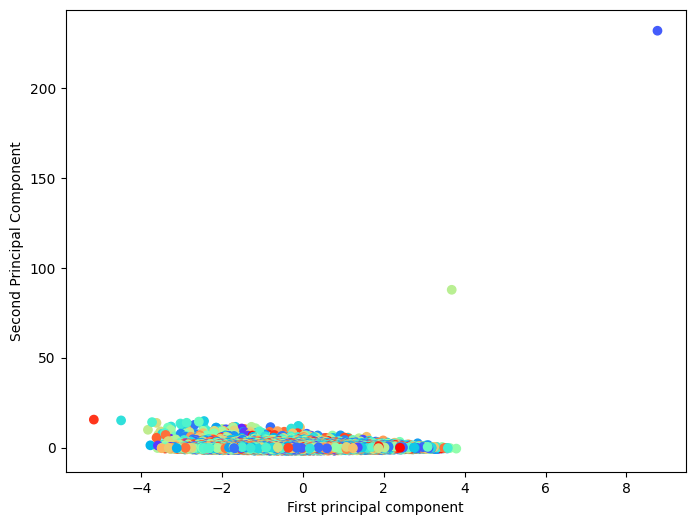

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,4],x_pca[:,1],c=user_ratio_usage['Total UL and DL'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Cumulative explained variance')

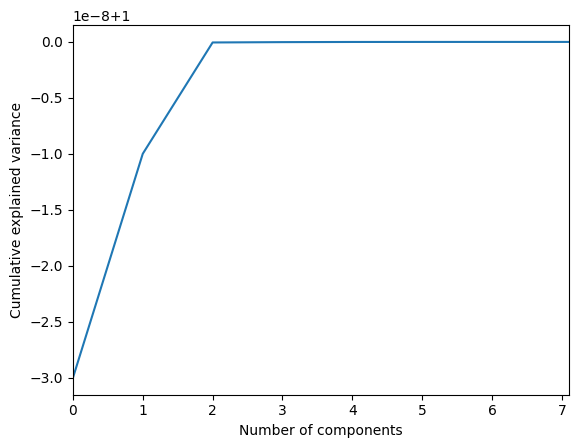

In [53]:
from sklearn.decomposition import PCA
pca = PCA().fit(numeric_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7.1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')